# OUTPUT ANALYSIS
Notebook to analyze the outputs generated by de MDR method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, json

In /home/hadoop/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/hadoop/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/hadoop/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/hadoop/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/hadoop/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [2]:
DATAPATH = "/home/hadoop/epistasia/data/"
RESULTSPATH = DATAPATH + "output/chr10_10k/"
INPUTPATH = DATAPATH + "input/syndata/chr10_10k.gz"
INFOPATH = DATAPATH + "info/"

In [3]:
def create_key(rs1, rs2):
    
    if rs1 >= rs2:
        return(rs1 + "_" + rs2)
    else:
        return(rs2 + "_" + rs1)
    
def are_gwas(rs1, rs2):
    ix = 0
    if rs1 in gwas:
        ix+=1
    if rs2 in gwas:
        ix+=1
    return ix

def is_gwas(rs):
    if rs in gwas:
        return 1
    else:
        return 0
    
def clean_rsid(rs):
    aux = rs
    for st in ["rs", "esv", ".-"]:
        aux = aux.replace(st,"chr" + rs.split("-")[0] + ":")
    aux = aux.split("-")[1]
    aux = aux.split(":")
    
    return aux[0] + ":" + aux[1]

In [4]:
## LOAD LIST OF SIGNIFICANT SNPs
# Read file of significant SNPs
significant = open(INFOPATH + '70K_significant.txt', 'r')
 
gwas = list()
count = 0
# Strips the newline character
for line in significant.readlines():
    count += 1
    if line.startswith("chr10"):
        #print("Line{}: {}".format(count, line.strip()))
        gwas.append(line.split()[0])


# SAVE RESULTS IN JSON

In [16]:
## LOAD RESULTS AND SAVE TO JSON

# Init dataframe list
dflist = list()

# Get number of folders to process
nfolders = len(os.listdir(RESULTSPATH))
print("Number of folders: " + str(nfolders))
c = 1
      
# Loop over all folders from the results path
for folder in os.listdir(RESULTSPATH):

    # Save every 100
    if c%100 == 0:
        print("Saving a partition " + str(int(c/100)) + " and reseting..")
        df = pd.DataFrame(dflist,
               columns =["key", "e1", "e2", "e3", "e4", "e5", "GWAS"])

        df.to_json(INFOPATH + "chr10_10k_" + str(int(c/100)))
        dflist = list()
        print("..done, processing folder " + str(c) + " of " + str(nfolders))
        
    # Loop over all subfolders
    for item in os.listdir(RESULTSPATH + folder):
        if not item.startswith("part"):
            continue
        if len(os.listdir(RESULTSPATH + folder)) < 6:
            continue

        # Open every partition
        with open(RESULTSPATH + folder + '/' + item, 'r') as part:
            for line in part:
                rsid1 = clean_rsid(line.split(",")[0].replace("(", "").replace("'","").strip())
                rsid2 = clean_rsid(line.split(",")[1].replace(")", "").replace("'","").strip())

                key = create_key(rsid1,rsid2)
                ngwas = are_gwas(rsid1, rsid2)

                p = list()
                for value in line.split(",")[2:]:
                    prec = value.replace("[","").replace("]", "").replace(")","").strip()
                    p.append(prec)
                    
                dflist.append((key,
                               round(float(p[0]),2),
                               round(float(p[1]),2),
                               round(float(p[2]),2),
                               round(float(p[3]),2),
                               round(float(p[4]),2),
                               ngwas))
                            
    c += 1


Number of folders: 11231
Saving a partition 1.0 and reseting..
..done, processing folder 100 of 11231
Saving a partition 2.0 and reseting..
..done, processing folder 200 of 11231
Saving a partition 3.0 and reseting..
..done, processing folder 300 of 11231
Saving a partition 4.0 and reseting..
..done, processing folder 400 of 11231
Saving a partition 5.0 and reseting..
..done, processing folder 500 of 11231
Saving a partition 6.0 and reseting..
..done, processing folder 600 of 11231
Saving a partition 7.0 and reseting..
..done, processing folder 700 of 11231
Saving a partition 8.0 and reseting..
..done, processing folder 800 of 11231
Saving a partition 9.0 and reseting..
..done, processing folder 900 of 11231
Saving a partition 10.0 and reseting..
..done, processing folder 1000 of 11231
Saving a partition 11.0 and reseting..
..done, processing folder 1100 of 11231
Saving a partition 12.0 and reseting..
..done, processing folder 1200 of 11231
Saving a partition 13.0 and reseting..
..done

Saving a partition 105.0 and reseting..
..done, processing folder 10500 of 11231
Saving a partition 106.0 and reseting..
..done, processing folder 10600 of 11231
Saving a partition 107.0 and reseting..
..done, processing folder 10700 of 11231
Saving a partition 108.0 and reseting..
..done, processing folder 10800 of 11231
Saving a partition 109.0 and reseting..
..done, processing folder 10900 of 11231
Saving a partition 110.0 and reseting..
..done, processing folder 11000 of 11231
Saving a partition 111.0 and reseting..
..done, processing folder 11100 of 11231
Saving a partition 112.0 and reseting..
..done, processing folder 11200 of 11231


# GET THE MEAN OF MEANS AND PLOT IT

In [39]:
## LOAD JSONS AND SAVE THE MEAN

# Create dict for saving the means
gwasd = dict()
for gw in range(3):
    gwasd[gw] = dict()
    for ix in range(5):
        gwasd[gw][ix+1] = list()

# Read all files and store the means
c = 0
tfiles = len(os.listdir(DATAPATH + "output/chr10_10k_json/"))
for file in os.listdir(DATAPATH + "output/chr10_10k_json/"):
    c+=1
    print("Processing file number " + str(c) + " of " + str(tfiles))
    df = pd.read_json(DATAPATH + "output/chr10_10k_json/" + file)
    for gw in range(3):
        for ix in range(5):
            gwasd[gw][ix+1].append(df.loc[df['GWAS'] == gw]["e"+str(ix+1)].mean())


Processing file number 1 of 112
Processing file number 2 of 112
Processing file number 3 of 112
Processing file number 4 of 112
Processing file number 5 of 112
Processing file number 6 of 112
Processing file number 7 of 112
Processing file number 8 of 112
Processing file number 9 of 112
Processing file number 10 of 112
Processing file number 11 of 112
Processing file number 12 of 112
Processing file number 13 of 112
Processing file number 14 of 112
Processing file number 15 of 112
Processing file number 16 of 112
Processing file number 17 of 112
Processing file number 18 of 112
Processing file number 19 of 112
Processing file number 20 of 112
Processing file number 21 of 112
Processing file number 22 of 112
Processing file number 23 of 112
Processing file number 24 of 112
Processing file number 25 of 112
Processing file number 26 of 112
Processing file number 27 of 112
Processing file number 28 of 112
Processing file number 29 of 112
Processing file number 30 of 112
Processing file num

In [53]:
# Get mean of the means
finalg = dict()
for key, value in gwasd.items():
    finalg[key] = list()
    for k2, v2 in value.items():
        finalg[key].append(np.nanmean(np.array(v2)))
        
for k, v in finalg.items():
    print(k,np.mean(v))

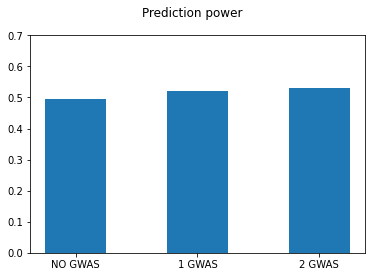

In [87]:
# Plot the means
names = ['NO GWAS', '1 GWAS', '2 GWAS']
values =[np.mean(x) for x in finalg.values()]

plt.figure(figsize=(6, 4))
plt.ylim(0,0.7)
plt.bar(names, values, width = 0.5)
plt.suptitle('Prediction power')
plt.show()

# GET TOP 100 PAIRS AND ANALYZE

In [5]:
## LOAD JSONS AND SAVE THE MEAN

df_dict = dict()
# Read all files and keep the top 50 of each file
c = 0
tfiles = len(os.listdir(DATAPATH + "output/chr10_10k_json/"))
for file in os.listdir(DATAPATH + "output/chr10_10k_json/"):
    c+=1
    print("Processing file number " + str(c) + " of " + str(tfiles))
    df = pd.read_json(DATAPATH + "output/chr10_10k_json/" + file)
    
    for n in range(1,6):
        it = "e" + str(n)
        aux = df.sort_values(it, ascending = False).head(25000)
        aux.insert(1, "p" + str(n), range(25000))
        if it not in df_dict.keys():
            df_dict[it] = aux
        else:
            df_dict[it] = df_dict[it].append(aux)
    

Processing file number 1 of 112
Processing file number 2 of 112
Processing file number 3 of 112
Processing file number 4 of 112
Processing file number 5 of 112
Processing file number 6 of 112
Processing file number 7 of 112
Processing file number 8 of 112
Processing file number 9 of 112
Processing file number 10 of 112
Processing file number 11 of 112
Processing file number 12 of 112
Processing file number 13 of 112
Processing file number 14 of 112
Processing file number 15 of 112
Processing file number 16 of 112
Processing file number 17 of 112
Processing file number 18 of 112
Processing file number 19 of 112
Processing file number 20 of 112
Processing file number 21 of 112
Processing file number 22 of 112
Processing file number 23 of 112
Processing file number 24 of 112
Processing file number 25 of 112
Processing file number 26 of 112
Processing file number 27 of 112
Processing file number 28 of 112
Processing file number 29 of 112
Processing file number 30 of 112
Processing file num

In [6]:
keys = ["e1", "e2", "e3", "e4", "e5"]

df100 = dict()
n = 1
for k in keys:
    df100[k] = df_dict[k].sort_values(k, ascending = False).head(25000)
    df100[k]["p" + str(n)] = range(25000)
    n += 1

In [7]:
df100

{'e1':                                    key     p1    e1    e2    e3    e4    e5  \
 771972   chr10:71942538_chr10:29431709      0  0.67  0.57  0.55  0.52  0.51   
 128190   chr10:58715032_chr10:36357781      1  0.67  0.54  0.52  0.52  0.53   
 527132    chr10:989507_chr10:126903420      2  0.67  0.51  0.55  0.54  0.56   
 1224     chr10:71942538_chr10:29431709      3  0.67  0.57  0.55  0.52  0.51   
 709062   chr10:58715032_chr10:36357781      4  0.67  0.54  0.52  0.52  0.53   
 ...                                ...    ...   ...   ...   ...   ...   ...   
 545533   chr10:37051241_chr10:29547894  24995  0.61  0.49  0.50  0.49  0.54   
 354052   chr10:7900076_chr10:199829051  24996  0.61  0.53  0.55  0.53  0.43   
 863420    chr10:950047_chr10:111936709  24997  0.61  0.46  0.50  0.51  0.49   
 628498     chr10:989507_chr10:74114000  24998  0.61  0.49  0.53  0.54  0.57   
 609963  chr10:67841083_chr10:110882068  24999  0.61  0.52  0.50  0.47  0.56   
 
         GWAS  
 771972     0  


In [8]:
pairpoints = dict()

for n in range(1,6):
    print(n)
    for row in df100["e" + str(n)].iterrows():
        key = row[1]["key"]
        points = row[1]["p" + str(n)]
        test = row[1]["e" + str(n)]
        if key not in pairpoints.keys():
            pairpoints[key] = dict()
            
        if n not in pairpoints[key]:
            pairpoints[key][n] = (points, test)
            
        #for m in range(n, 6):
            #if n == m:
             #   continue
            #for mrow in df100["e" + str(m)].iterrows():
                #if mrow[1]["key"] == key:
                    #pairpoints[key][m] = mrow[1]["p" + str(m)]
        

1
2
3
4
5


In [10]:
for k,v in pairpoints.items():
    if len(list(v.keys())) > 2:
        print(k,v)

chr10:117134471_chr10:114821527 {2: (598, 0.64), 4: (21657, 0.61), 5: (17885, 0.62)}
chr10:33175587_chr10:114806697 {2: (1115, 0.64), 4: (24531, 0.61), 5: (1801, 0.63)}
chr10:4962666_chr10:114821527 {2: (2053, 0.63), 4: (24044, 0.61), 5: (3858, 0.63)}
chr10:25212916_chr10:114821527 {2: (2233, 0.63), 4: (20942, 0.61), 5: (13106, 0.62)}
chr10:27513070_chr10:114806697 {2: (2970, 0.63), 4: (7222, 0.62), 5: (1587, 0.63)}
chr10:114821527_chr10:10794967 {2: (4597, 0.63), 4: (16197, 0.61), 5: (13716, 0.62)}
chr10:2120794_chr10:114821527 {2: (4664, 0.63), 4: (15135, 0.61), 5: (1495, 0.63)}
chr10:7910123_chr10:114821527 {2: (7093, 0.63), 4: (3692, 0.62), 5: (18771, 0.62)}
chr10:54385340_chr10:114821527 {2: (7407, 0.63), 4: (19870, 0.61), 5: (9074, 0.62)}
chr10:123198475_chr10:114821527 {2: (8415, 0.63), 4: (18515, 0.61), 5: (14081, 0.62)}
chr10:183236501_chr10:114821527 {2: (18947, 0.62), 4: (3624, 0.62), 5: (1620, 0.63)}
chr10:183236501_chr10:114806697 {2: (18967, 0.62), 4: (7613, 0.62), 5: (16

In [11]:
with open('pairpoints100.json', 'w') as fp:
    json.dump(pairpoints, fp)


In [12]:
with open('pairpoints100.json', 'r') as fp:
    pairpoints = json.load(fp)


In [13]:
toppairpoints = list()
for key, value in pairpoints.items():
    total = 0
    totaltest = 0
    if len(value) > 1:
        aux = list()
        aux.append(key)
        for i in range(1,6):
            it = str(i)
            if it in value.keys():
                aux.append(value[it][0])
                #aux.append(value[it][1])
                total+=value[it][0]
                #totaltest+=value[it][1]
            else:
                aux.append(0)
                #aux.append(0)
                total+=500000
                #totaltest+=0
                
        aux.append([int(x) for x in value.keys()])
        aux.append(are_gwas(key.split("_")[0], key.split("_")[1]))
        aux.append(total)
        #aux.append(totaltest)
        
        toppairpoints.append(aux)

In [36]:
#topdf = pd.DataFrame(toppairpoints, columns = ["key", "e1", "p1", "e2", "p2", "e3", "p3", "e4", "p4", "e5", "p5", "Top", "GW", "Pts"])
topdf = pd.DataFrame(toppairpoints, columns = ["key", "e1", "e2", "e3", "e4", "e5", "Top", "GW", "Pts"])

In [37]:
sorttop = topdf.sort_values("Pts", ascending = True)
sorttop100 = sorttop.head(100)

In [38]:
print(sorttop100.to_string(index=False))

                             key    e1     e2    e3     e4     e5        Top  GW      Pts
  chr10:27513070_chr10:114806697     0   2970     0   7222   1587  [2, 4, 5]   1  1011779
   chr10:2120794_chr10:114821527     0   4664     0  15135   1495  [2, 4, 5]   1  1021294
 chr10:183236501_chr10:114821527     0  18947     0   3624   1620  [2, 4, 5]   1  1024191
  chr10:33175587_chr10:114806697     0   1115     0  24531   1801  [2, 4, 5]   1  1027447
 chr10:183236501_chr10:114806697     0  18967     0   7613   1616  [2, 4, 5]   1  1028196
   chr10:7910123_chr10:114821527     0   7093     0   3692  18771  [2, 4, 5]   1  1029556
   chr10:4962666_chr10:114821527     0   2053     0  24044   3858  [2, 4, 5]   1  1029955
  chr10:69769606_chr10:114821527     0  24051     0   3824   2717  [2, 4, 5]   1  1030592
  chr10:114821527_chr10:10794967     0   4597     0  16197  13716  [2, 4, 5]   1  1034510
  chr10:25212916_chr10:114821527     0   2233     0  20942  13106  [2, 4, 5]   1  1036281
  chr10:54

In [39]:
print("Number of PAIRS with 0 GWAS SNP in top 100: " + str(sum(sorttop100["GW"] == 0)))
print("Number of PAIRS with 1 GWAS SNP in top 100: " + str(sum(sorttop100["GW"] == 1)))
print("Number of PAIRS with 2 GWAS SNP in top 100: " + str(sum(sorttop100["GW"] == 2)))


Number of PAIRS with 0 GWAS SNP in top 100: 14
Number of PAIRS with 1 GWAS SNP in top 100: 77
Number of PAIRS with 2 GWAS SNP in top 100: 9


2048


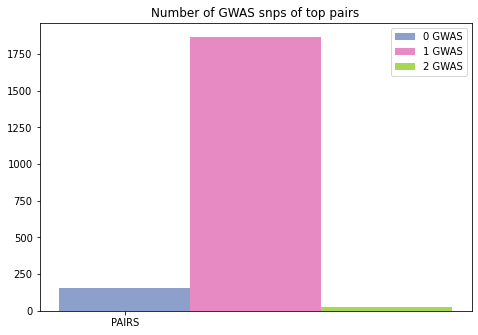

In [40]:
# NGWAS - toppairpoints[7]

import seaborn as sns
gld = dict()
gld[0] = 0
gld[1] = 0
gld[2] = 0
for row in toppairpoints:
    gld[row[7]] += 1
        
        
print(len(toppairpoints))

cl = sns.color_palette("Set2")

X = np.arange(1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(X, ["PAIRS"])
plt.title("Number of GWAS snps of top pairs")
ax.bar(X + 0.00, gld[0], color = cl[2], width = 0.25)
ax.bar(X + 0.25, gld[1], color = cl[3], width = 0.25)
ax.bar(X + 0.50, gld[2], color = cl[4], width = 0.25)
ax.legend([str(0) + " GWAS", str(1) + " GWAS",str(2) + " GWAS"])


In [41]:
# NGWAS - toppairpoints[7]

import seaborn as sns
klist = list()
gld[0] = 0
gld[1] = 0
for row in toppairpoints:
    rs = row[0]
    klist.append(rs.split("_")[0]) 
    klist.append(rs.split("_")[1])
    
for row in list(set(klist)):
    if is_gwas(row):
        gld[1] += 1
    else:
        gld[0] +=1
    
        
print("GWAS in TOP PAIRS: " + str((gld[1])))
print("SNPS in TOP PAIRS: " + str(len(set(klist))))

print("GWAS in ALL DATA: 104")
print("SNPS in ALL DATA: 10.104")

reltop = gld[1]/len((set(klist)))
relori = 104/10104
print("GWAS/SNPS in TOP PAIRS: " + str(reltop*100) + " %")
print("GWAS/SNPS in ALL DATA: " + str(relori*100) + " %")
print("Increase: " + str((reltop-relori)/relori*100) + " %")


GWAS in TOP PAIRS: 29
SNPS in TOP PAIRS: 1888
GWAS in ALL DATA: 104
SNPS in ALL DATA: 10.104
GWAS/SNPS in TOP PAIRS: 1.5360169491525424 %
GWAS/SNPS in ALL DATA: 1.0292953285827395 %
Increase: 49.22995436766623 %


In [70]:
snpslist = list()
for row in toppairpoints:
    key = row[0]
    snpslist.append(key.split("_")[0])
    snpslist.append(key.split("_")[1])

print(len(snpslist), len(set(snpslist)))

ng = 0
for sn in set(snpslist):
    if is_gwas(sn):
        ng += 1
        
print(ng)

13136 5061
50


In [71]:
from collections import Counter
auxlist = list()
for snp, c in dict(Counter(snpslist)).items():
    auxlist.append((snp, c, is_gwas(snp)))
    
snpcount = pd.DataFrame(auxlist, columns = ["Key", "Counts", "Gwas"])
print(snpcount.sort_values("Counts", ascending = False).head(20).to_string(index=False))


             Key  Counts  Gwas
 chr10:114821527    4298     1
 chr10:114806697    1440     1
 chr10:114799172      91     1
 chr10:114788815      89     1
 chr10:114798893      88     1
 chr10:108432828      63     0
 chr10:114791490      41     1
 chr10:114788436      40     1
 chr10:114817009      32     1
 chr10:114765747      22     1
 chr10:114767771      21     1
 chr10:123029418      21     0
 chr10:114785424      17     1
 chr10:114781950      16     1
 chr10:114750380      14     1
 chr10:114753259      11     1
 chr10:114487812      11     0
 chr10:121917060      11     0
  chr10:72826736      10     0
 chr10:114734096      10     1


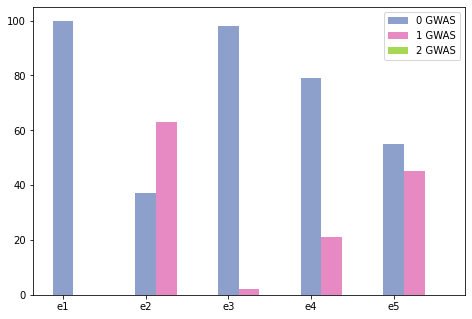

In [140]:
import seaborn as sns
gld = dict()
for k in df_dict.keys():
    aux = df_dict[k].sort_values(k, ascending = False).head(100)
    for gw in range(3):
        if gw not in gld.keys():
            gld[gw] = list()
        gld[gw].append(len(aux.loc[aux['GWAS'] == gw]))
        
        
cl = sns.color_palette("Set2")

X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(X, ["e1","e2","e3","e4","e5"])
ax.bar(X + 0.00, gld[0], color = cl[2], width = 0.25)
ax.bar(X + 0.25, gld[1], color = cl[3], width = 0.25)
ax.bar(X + 0.50, gld[2], color = cl[4], width = 0.25)
ax.legend([str(0) + " GWAS", str(1) + " GWAS",str(2) + " GWAS"])

    

/home/hadoop/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if sys.path[0] == '':


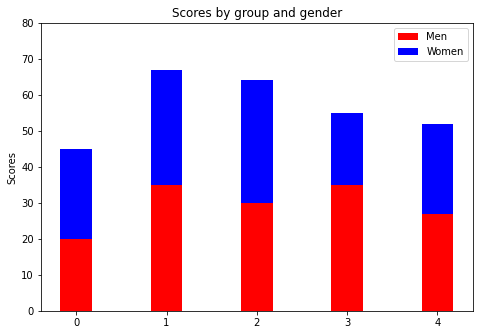

In [138]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, menMeans, width, color='r')
ax.bar(ind, womenMeans, width,bottom=menMeans, color='b')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Men', 'Women'])
plt.show()

In [108]:
df_dict["e5"].sort_values("e5", ascending = False).head(50)

key    e1    e2    e3    e4    e5  GWAS
271748   chr10:114806697_chr10:10884798  0.47  0.62  0.55  0.55  0.65     1
830569   chr10:34747695_chr10:114821527  0.50  0.61  0.52  0.59  0.64     1
391178      chr10:78975716_chr10:668214  0.49  0.54  0.48  0.59  0.64     0
265864   chr10:114748029_chr10:10884798  0.47  0.54  0.50  0.50  0.64     1
917581   chr10:72766472_chr10:127046932  0.54  0.46  0.52  0.53  0.63     0
262919   chr10:114782790_chr10:10884798  0.48  0.60  0.57  0.56  0.63     1
754638     chr10:7080161_chr10:10252995  0.56  0.54  0.50  0.48  0.63     0
393527    chr10:78975716_chr10:67662782  0.53  0.48  0.49  0.54  0.63     0
629845     chr10:7918583_chr10:27431079  0.54  0.59  0.50  0.48  0.63     0
630763     chr10:7918583_chr10:27417059  0.54  0.59  0.50  0.48  0.63     0
642276   chr10:79961222_chr10:134409900  0.54  0.49  0.56  0.56  0.63     0
563022   chr10:27740138_chr10:114821527  0.49  0.63  0.52  0.59  0.63     1
262917   chr10:114781950_chr10:10884798  0.49  0.60  0.57  0.57  0.63     1
64118     chr10:1926808_chr10:127046932  0.54  0.46  0.52  0.53  0.63     0
209041   chr10:114721671_chr10:11185880  0.52  0.50  0.48  0.54  0.63     1
392700   chr10:78975716_chr10:132010639  0.51  0.56  0.51  0.54  0.63     0
36800     chr10:86288799_chr10:11009673  0.54  0.51  0.54  0.51  0.63     0
265865   chr10:114748497_chr10:10884798  0.51  0.58  0.50  0.54  0.63     1
384165     chr10:78975716_chr10:7068285  0.52  0.58  0.51  0.54  0.63     0
443482    chr10:7086922_chr10:114806697  0.50  0.60  0.56  0.61  0.63     1
393164    chr10:78975716_chr10:78044275  0.50  0.60  0.51  0.56  0.63     0
36803     chr10:86293782_chr10:11009673  0.55  0.51  0.54  0.51  0.63     0
310478  chr10:122295241_chr10:114830306  0.51  0.48  0.51  0.58  0.63     1
659402   chr10:55940535_chr10:149164908  0.54  0.56  0.50  0.54  0.63     0
522279   chr10:98789223_chr10:127184196  0.51  0.51  0.44  0.55  0.63     0
392477    chr10:84468283_chr10:78975716  0.50  0.55  0.47  0.55  0.63     0
881079   chr10:114821527_chr10:10822416  0.50  0.63  0.52  0.59  0.62     1
265424    chr10:55940535_chr10:10884798  0.55  0.52  0.48  0.53  0.62     0
474930  chr10:185474383_chr10:121983896  0.55  0.53  0.53  0.50  0.62     0
78132   chr10:132975406_chr10:114830306  0.52  0.47  0.50  0.57  0.62     1
389735    chr10:80077208_chr10:78975716  0.52  0.54  0.48  0.54  0.62     0
775164    chr10:1755078_chr10:114821527  0.50  0.63  0.52  0.59  0.62     1
269082   chr10:114750380_chr10:10884798  0.46  0.60  0.53  0.53  0.62     1
309890   chr10:36545535_chr10:122295241  0.52  0.54  0.55  0.52  0.62     0
388809    chr10:78975716_chr10:47678244  0.54  0.55  0.49  0.57  0.62     0
386002    chr10:78975716_chr10:27959144  0.54  0.50  0.47  0.54  0.62     0
246076    chr10:76253072_chr10:11599845  0.52  0.54  0.53  0.57  0.62     0
385557      chr10:78975716_chr10:363296  0.54  0.50  0.49  0.51  0.62     0
259962    chr10:7098152_chr10:114821527  0.50  0.63  0.52  0.58  0.62     1
100014   chr10:79306831_chr10:114806697  0.50  0.63  0.57  0.59  0.62     1
386036   chr10:78975716_chr10:108723075  0.54  0.53  0.49  0.55  0.62     0
698424     chr10:92638405_chr10:2862833  0.52  0.54  0.53  0.54  0.62     0
78126   chr10:132975406_chr10:114821527  0.50  0.62  0.52  0.59  0.62     1
360982    chr10:7099883_chr10:114821527  0.50  0.63  0.52  0.57  0.62     1
350880   chr10:57848232_chr10:114821527  0.50  0.63  0.52  0.58  0.62     1
269084   chr10:114752503_chr10:10884798  0.47  0.59  0.54  0.54  0.62     1
554604    chr10:2452419_chr10:114806697  0.51  0.61  0.54  0.56  0.62     1
391288   chr10:78975716_chr10:114821527  0.48  0.64  0.52  0.59  0.62     1
595012  chr10:129299828_chr10:114806697  0.49  0.62  0.55  0.58  0.62     1
282992   chr10:83208474_chr10:121983896  0.53  0.54  0.53  0.50  0.62     0